In [ ]:
!pip install pyodbc pandas sqlalchemy

In [ ]:
import pyodbc
import pandas as pd

conn = pyodbc.connect(
    "DRIVER={ODBC Driver 17 for SQL Server};"
    "SERVER=localhost\SQLEXPRESS;"
    "DATABASE=BankingCase;"
    "Trusted_Connection=yes;"
)

query = "SELECT * FROM dbo.BankingClients"

df = pd.read_sql(query, conn)

df.head()

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_sql("select * from BankingClients",conn)
df.info()

In [ ]:
df.describe()

,Age,Location_ID,Estimated_Income,Superannuation_Savings,Amount_of_Credit_Cards,Credit_Card_Balance,Bank_Loans,Bank_Deposits,Checking_Accounts,Saving_Accounts,Foreign_Currency_Account,Business_Lending,Properties_Owned,Risk_Weighting,BRId,GenderId,IAId
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,51.039667,21563.323000,171305.034184,25531.599685,1.463667,3176.206944,5.913862e+05,6.715602e+05,3.210929e+05,2.329084e+05,29883.529998,8.667598e+05,1.518667,2.249333,2.559333,1.504000,10.425333
std,19.854760,12462.273017,111935.808180,16259.950768,0.676387,2497.094709,4.575570e+05,6.457169e+05,2.820796e+05,2.300078e+05,23109.924033,6.412303e+05,1.102145,1.131191,1.007713,0.500067,5.988242
min,17.000000,12.000000,15919.480469,1482.030029,1.000000,1.170000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,45.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.000000
25%,34.000000,10803.500000,82906.597656,12513.774902,1.000000,1236.630005,2.396281e+05,2.044004e+05,1.199475e+05,7.479440e+04,11916.542236,3.748251e+05,1.000000,1.000000,2.000000,1.000000,5.000000
50%,51.000000,21129.500000,142313.476562,22357.355469,1.000000,2560.804932,4.797934e+05,4.633165e+05,2.428157e+05,1.640866e+05,24341.190430,7.113147e+05,2.000000,2.000000,3.000000,2.000000,10.000000
75%,69.000000,32054.500000,242290.300781,35464.741211,2.000000,4522.632690,8.258130e+05,9.427546e+05,4.348749e+05,3.155750e+05,41966.391602,1.185110e+06,2.000000,3.000000,3.000000,2.000000,15.000000
max,85.000000,43369.000000,522330.250000,75963.898438,3.000000,13991.990234,2.667557e+06,3.890598e+06,1.969923e+06,1.724118e+06,124704.867188,3.825962e+06,3.000000,5.000000,4.000000,2.000000,22.000000


In [11]:
bins = [0, 100000, 300000, float('inf')]
labels = ['Low','Mid','High']
df['Income_Band'] = pd.cut(df['Estimated_Income'],bins=bins,labels=labels,right=False)

<Axes: xlabel='Income_Band'>

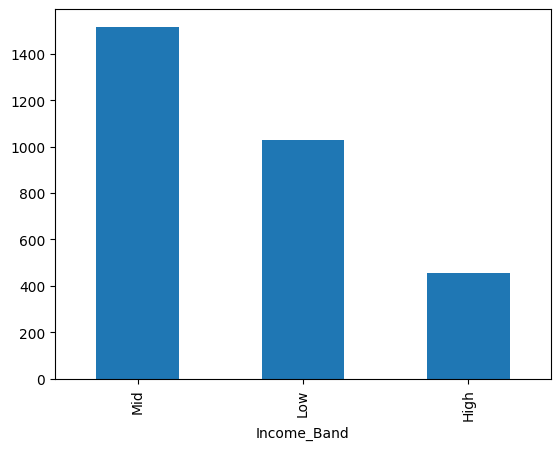

In [ ]:
df['Income_Band'].value_counts().plot(kind='bar')

In [ ]:
# Examine the distribution of unique categories in categorical columns

categorical_cols = df[['BRId','GenderId','IAId','Amount_of_Credit_Cards',
                       'Nationality','Occupation','Fee_Structure',
                       'Loyalty_Classification','Properties_Owned',
                       'Risk_Weighting','Income_Band']].columns

for col in categorical_cols:
    print(f'Value Counts for {col}:')
    display(df[col].value_counts())

Value Counts for BRId:


BRId
3    1352
1     660
2     495
4     493
Name: count, dtype: int64

Value Counts for GenderId:


GenderId
2    1512
1    1488
Name: count, dtype: int64

Value Counts for IAId:


IAId
1     177
2     177
3     177
4     177
8     177
9     176
10    176
11    176
12    176
13    176
14    176
15    176
5      89
6      89
7      89
16     88
17     88
18     88
19     88
20     88
21     88
22     88
Name: count, dtype: int64

Value Counts for Amount_of_Credit_Cards:


Amount_of_Credit_Cards
1    1922
2     765
3     313
Name: count, dtype: int64

Value Counts for Nationality:


Nationality
European      1309
Asian          754
American       507
Australian     254
African        176
Name: count, dtype: int64

Value Counts for Occupation:


Occupation
Associate Professor             28
Structural Analysis Engineer    28
Recruiter                       25
Account Coordinator             24
Human Resources Manager         24
                                ..
Office Assistant IV              8
Automation Specialist I          7
Computer Systems Analyst I       6
Developer III                    5
Senior Sales Associate           4
Name: count, Length: 195, dtype: int64

Value Counts for Fee_Structure:


Fee_Structure
High    1476
Mid      962
Low      562
Name: count, dtype: int64

Value Counts for Loyalty_Classification:


Loyalty_Classification
Jade        1331
Silver       767
Gold         585
Platinum     317
Name: count, dtype: int64

Value Counts for Properties_Owned:


Properties_Owned
2    777
1    776
3    742
0    705
Name: count, dtype: int64

Value Counts for Risk_Weighting:


Risk_Weighting
2    1222
1     836
3     460
4     322
5     160
Name: count, dtype: int64

Value Counts for Income_Band:


Income_Band
Mid     1517
Low     1027
High     456
Name: count, dtype: int64

## Categorical Analysis

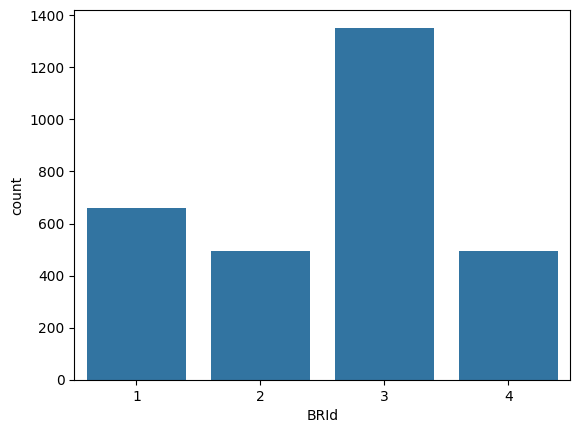

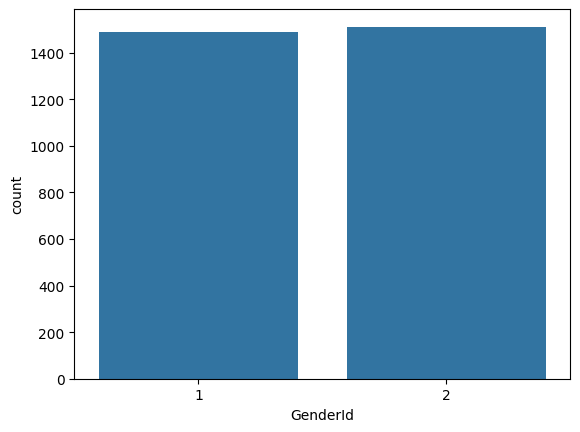

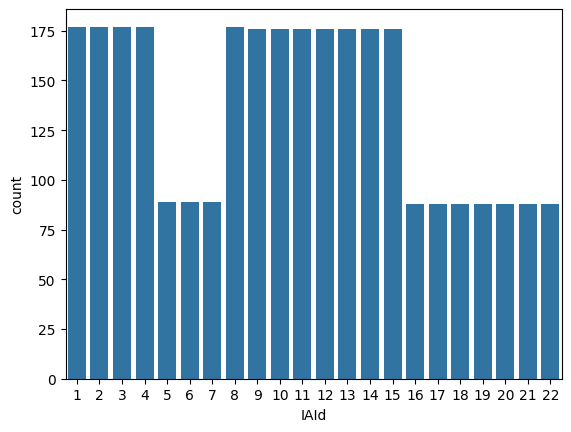

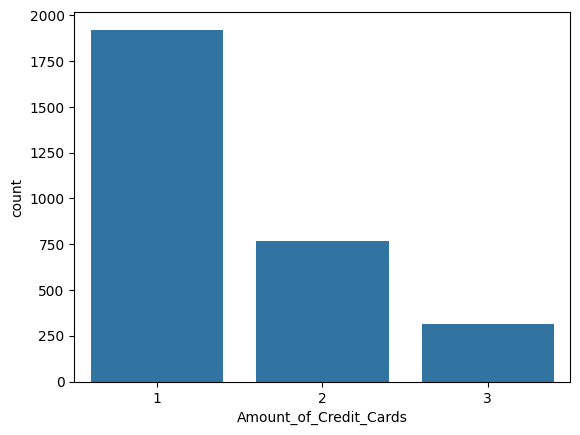

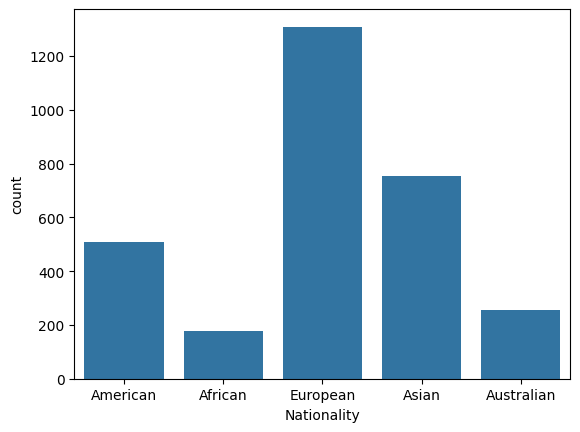

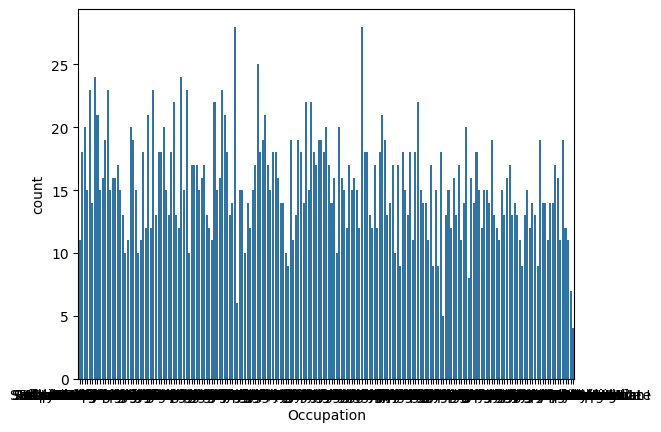

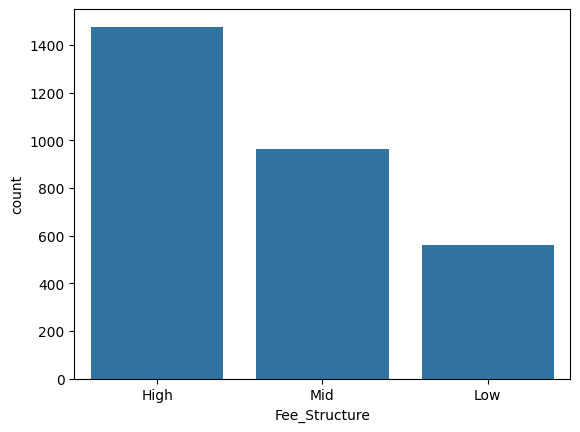

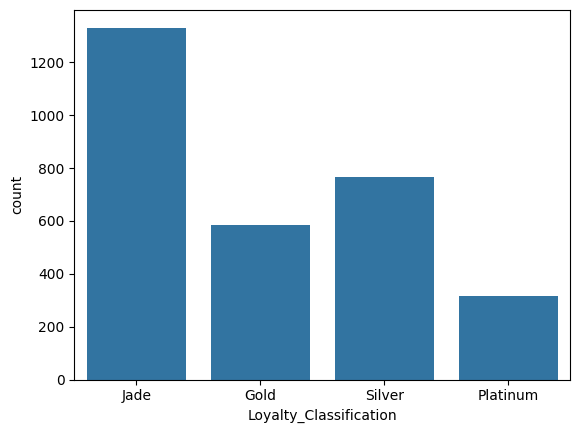

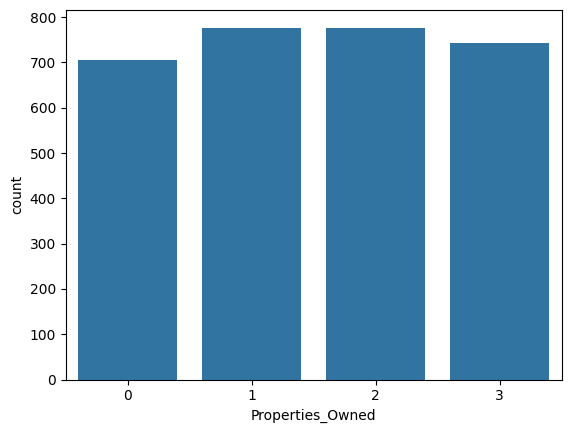

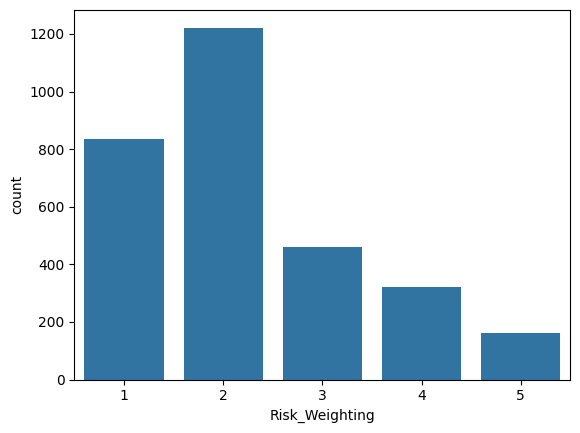

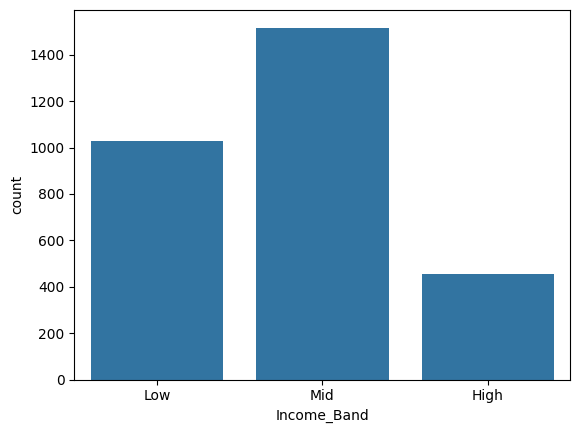

In [ ]:
for i, predictor in enumerate(df[['BRId','GenderId','IAId','Amount_of_Credit_Cards',
                       'Nationality','Occupation','Fee_Structure',
                       'Loyalty_Classification','Properties_Owned',
                       'Risk_Weighting','Income_Band']]):
    plt.figure(i)
    sns.countplot(data=df, x=predictor)

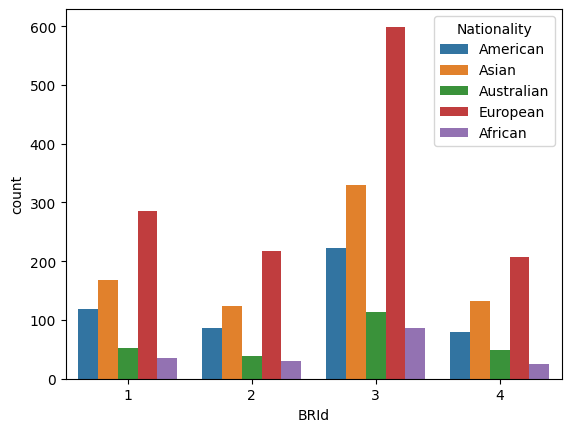

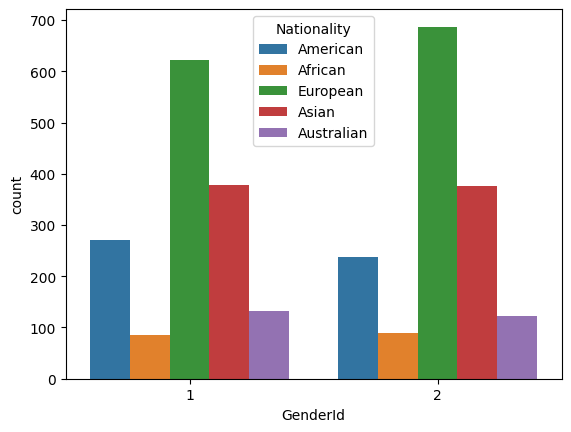

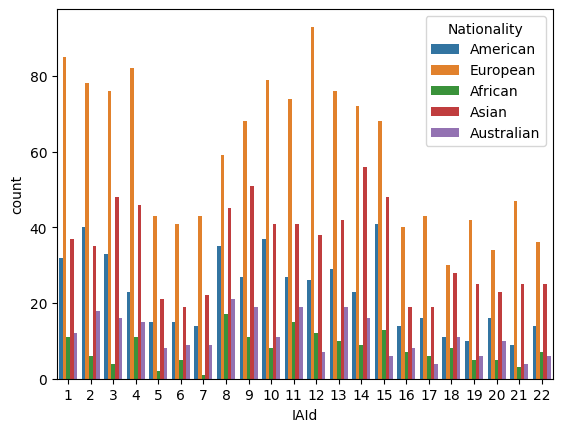

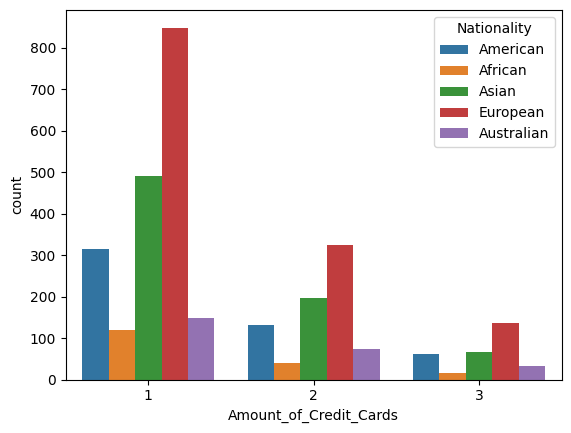

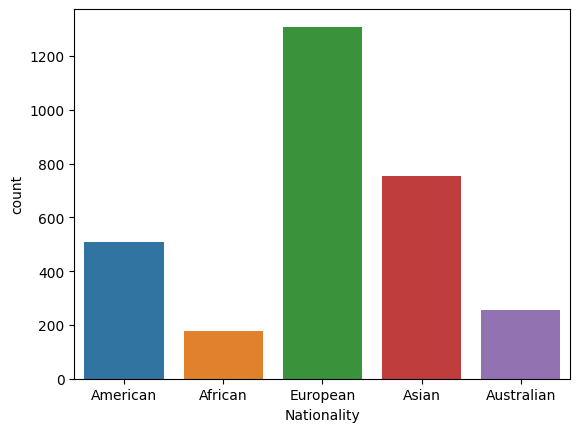

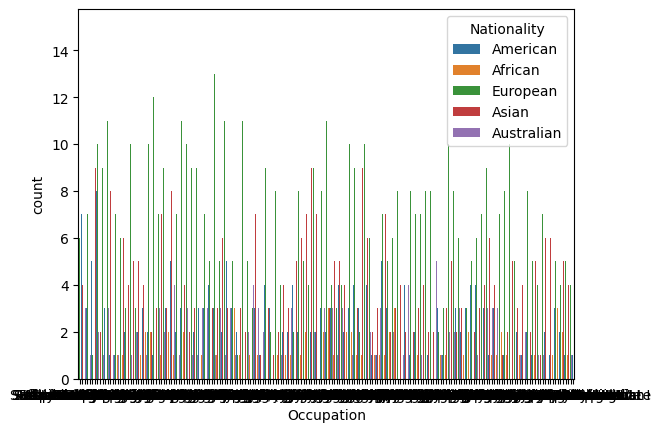

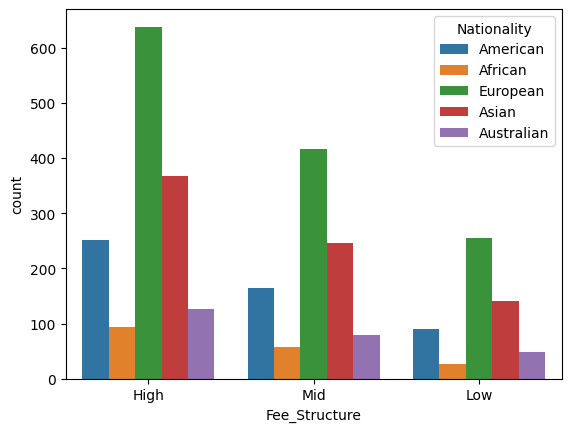

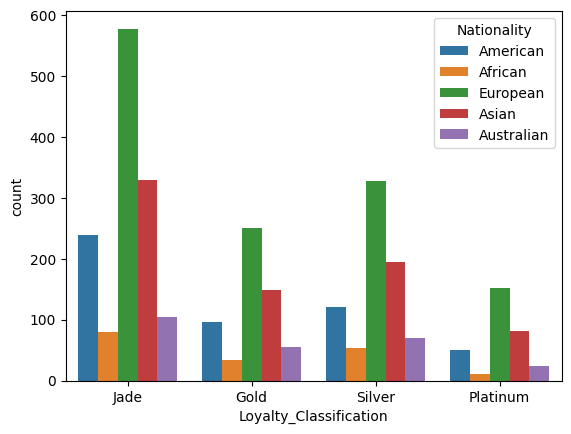

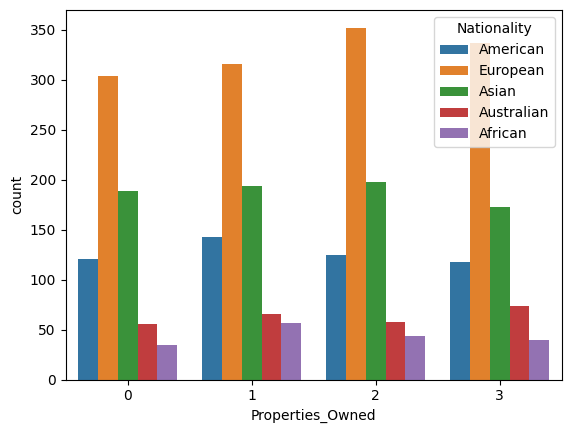

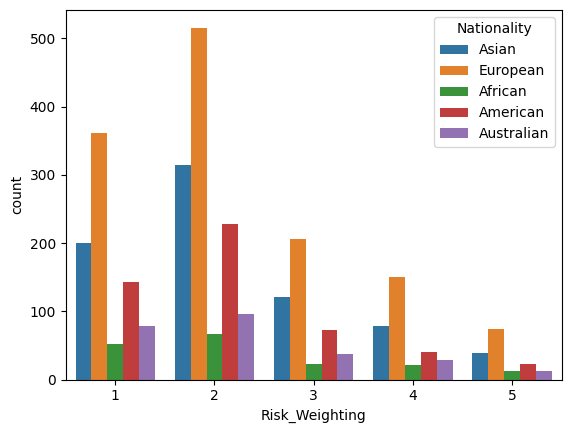

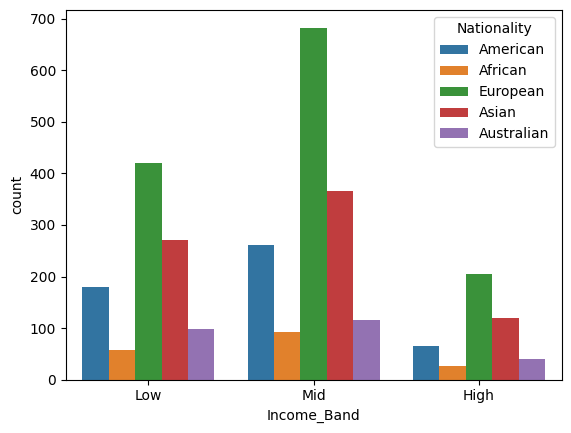

In [ ]:
for i, predictor in enumerate(df[['BRId','GenderId','IAId','Amount_of_Credit_Cards',
                       'Nationality','Occupation','Fee_Structure',
                       'Loyalty_Classification','Properties_Owned',
                       'Risk_Weighting','Income_Band']]):
    plt.figure(i)
    sns.countplot(data=df, x=predictor, hue='Nationality')

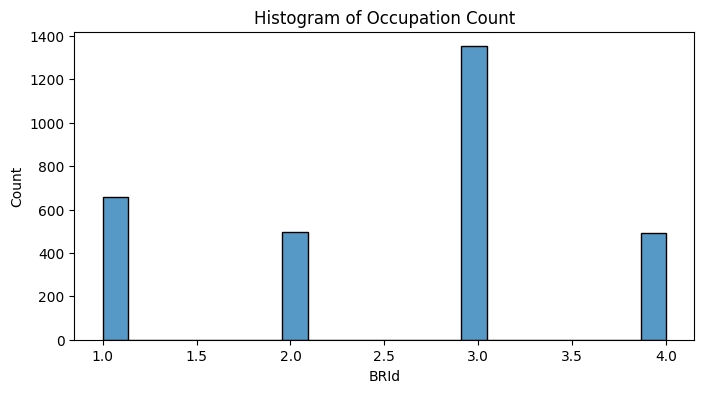

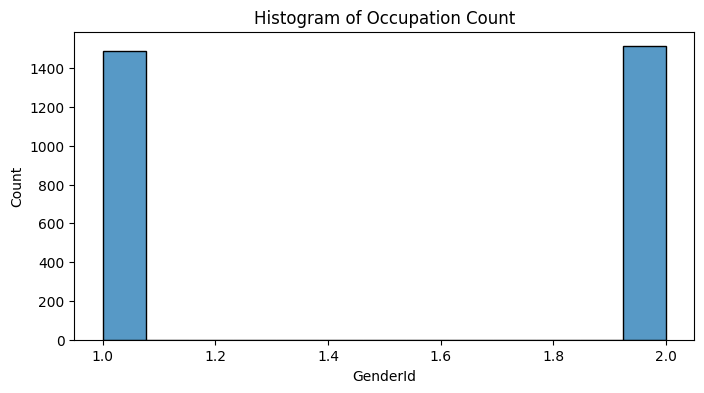

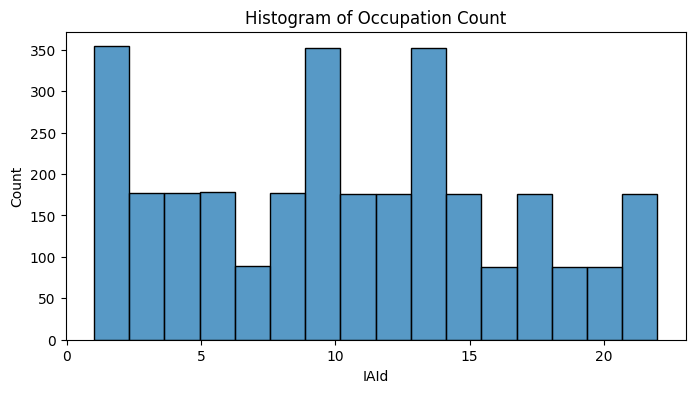

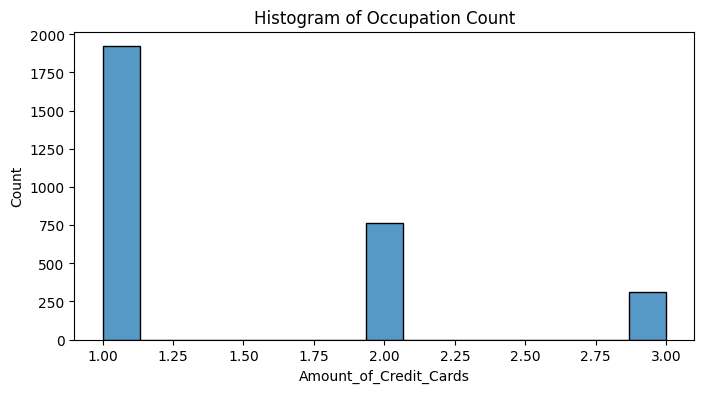

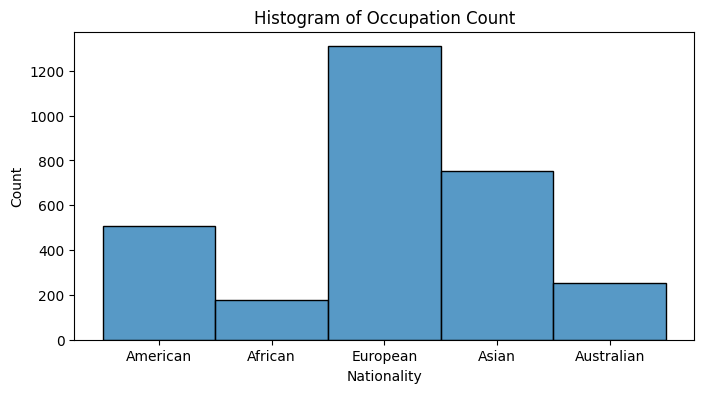

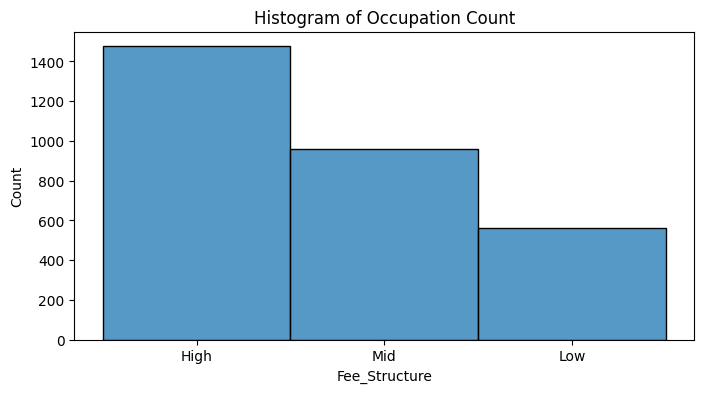

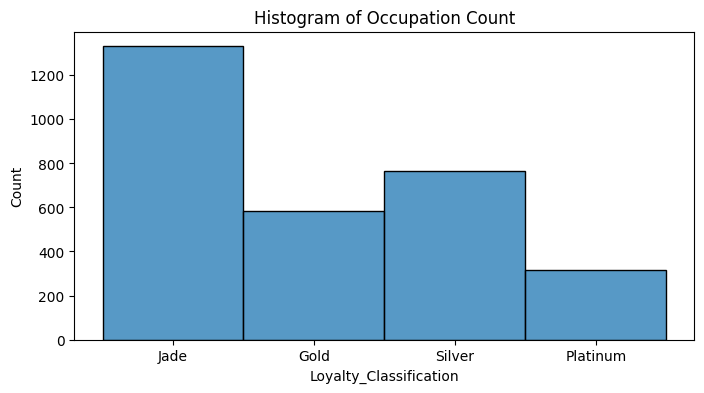

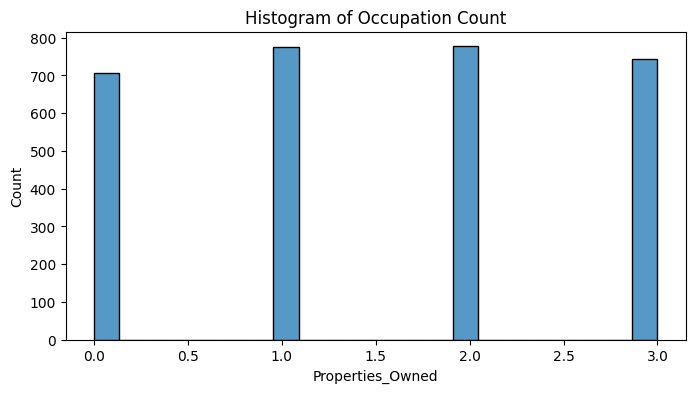

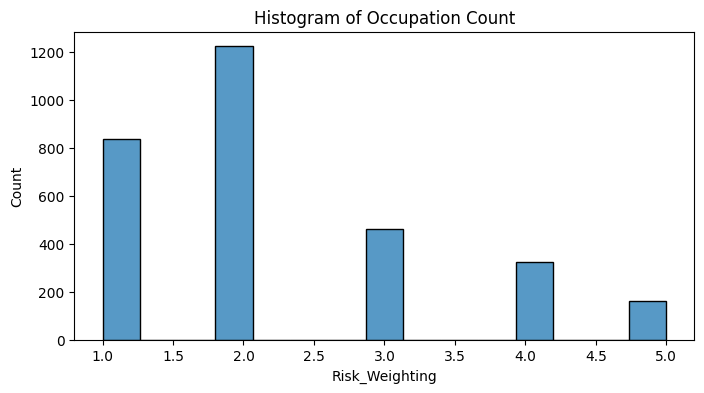

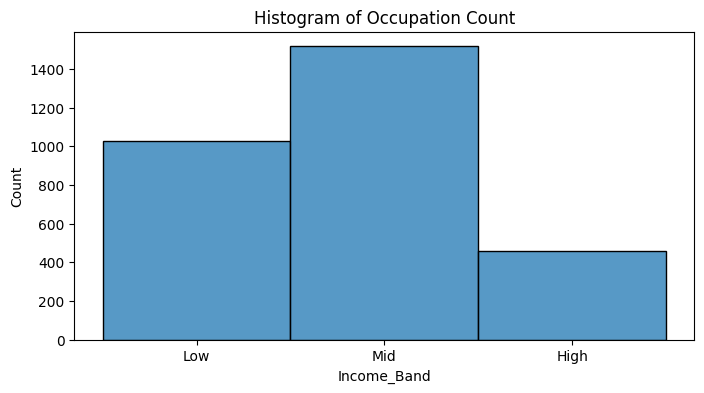

In [ ]:
#Histogram of value counts for different occupation


for col in categorical_cols:
    if col == 'Occupation':
        continue
    plt.figure(figsize=(8,4))
    sns.histplot(df[col])
    plt.title('Histogram of Occupation Count')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()
    

## Numerical Analysis

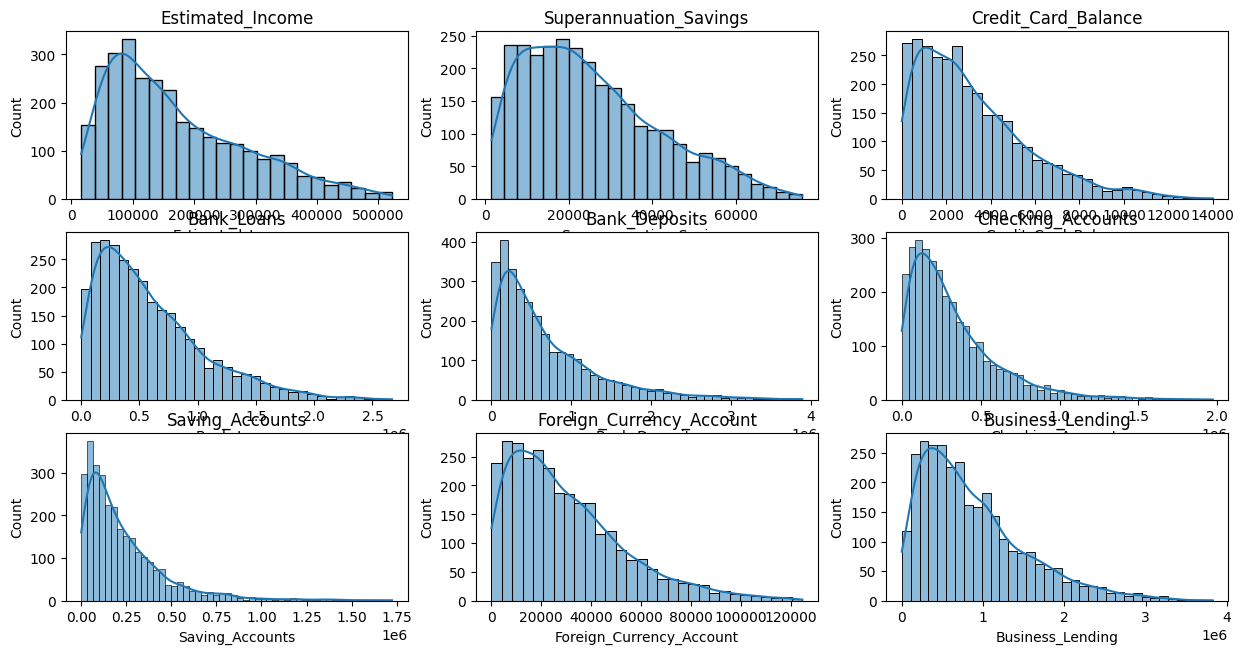

In [ ]:
numerical_cols = ['Estimated_Income', 'Superannuation_Savings','Credit_Card_Balance','Bank_Loans','Bank_Deposits','Checking_Accounts','Saving_Accounts','Foreign_Currency_Account','Business_Lending']

#Univariate Analysis
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,3,i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.show()


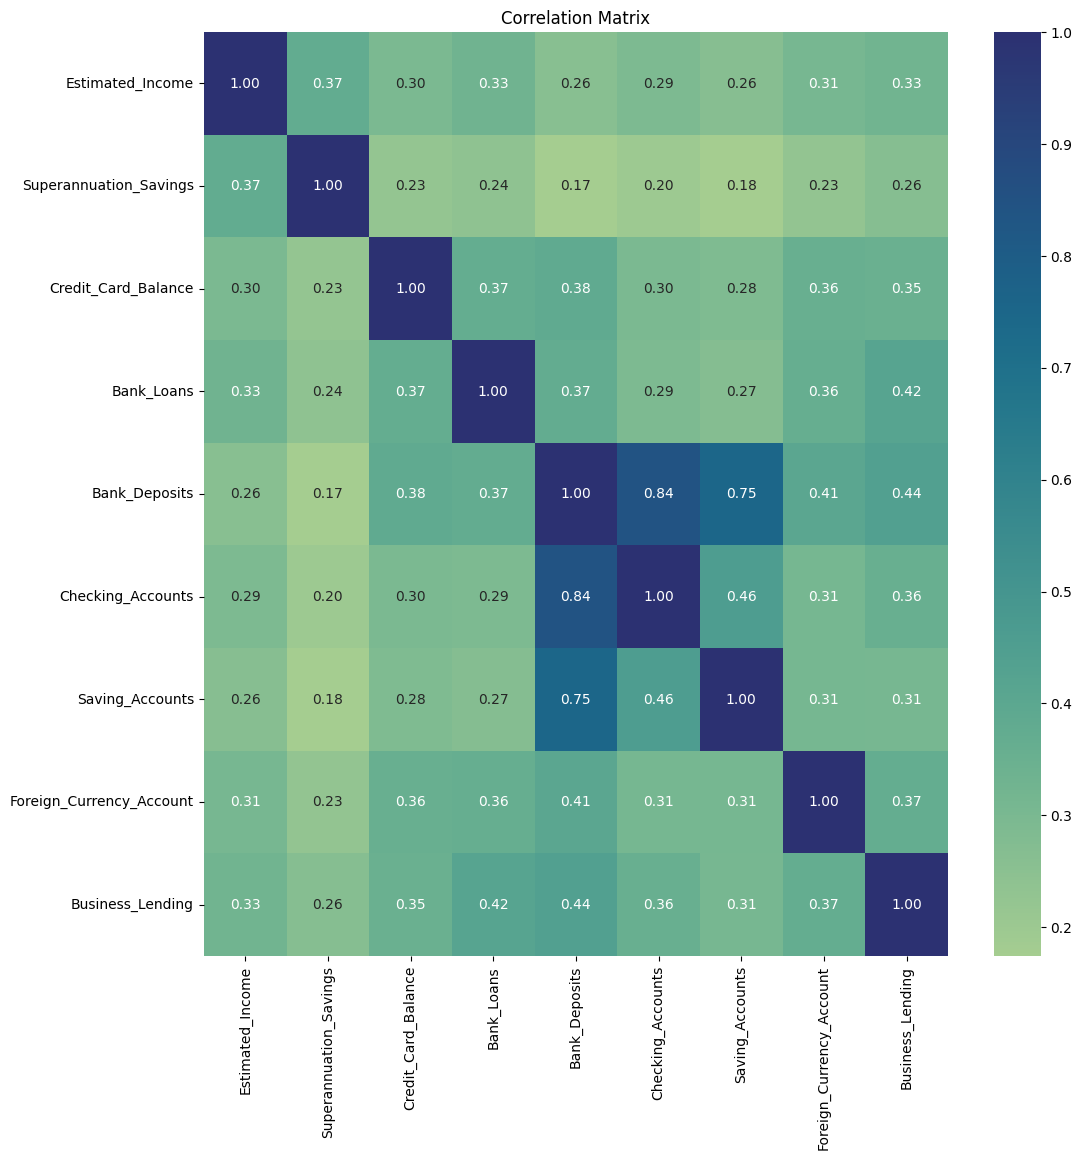

In [ ]:
numerical_cols = ['Estimated_Income', 'Superannuation_Savings','Credit_Card_Balance','Bank_Loans','Bank_Deposits','Checking_Accounts','Saving_Accounts','Foreign_Currency_Account','Business_Lending']

correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(12,12))
sns.heatmap(correlation_matrix, annot=True, cmap='crest', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()